# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Reading the data

In [7]:
df = pd.read_excel("Datasets/registeredVehicle.xlsx")
df.head()

,New,Renewal,Year,City Office,Motor Vehicle Type
0,1225,10929,2011,Kaloocan DO,CAR
1,1570,26676,2011,Kaloocan DO,UV
2,517,4164,2011,Kaloocan DO,SUV
3,219,6983,2011,Kaloocan DO,TRUCKS
4,118,894,2011,Kaloocan DO,BUSES


In [8]:
df['Total'] = df.loc[:,['New','Renewal']].sum(axis=1)
df

,New,Renewal,Year,City Office,Motor Vehicle Type,Total
0,1225,10929,2011,Kaloocan DO,CAR,12154
1,1570,26676,2011,Kaloocan DO,UV,28246
2,517,4164,2011,Kaloocan DO,SUV,4681
3,219,6983,2011,Kaloocan DO,TRUCKS,7202
4,118,894,2011,Kaloocan DO,BUSES,1012
...,...,...,...,...,...,...
1745,0,9233,2020,Valenzuela DO,SUV,9233
1746,0,8207,2020,Valenzuela DO,TRUCKS,8207
1747,0,98,2020,Valenzuela DO,BUSES,98
1748,0,64620,2020,Valenzuela DO,MC/TC,64620


In [9]:
overall_total =df.iloc[:,5].values

total = 0
for i in overall_total:
    total += i
# groupedvalues['overall_total'] = overall_total
# groupedvalues.head()
# overall_total
# total = total[0]
total

21206426

Text(0.5, 1.0, 'Registered Vehicle')

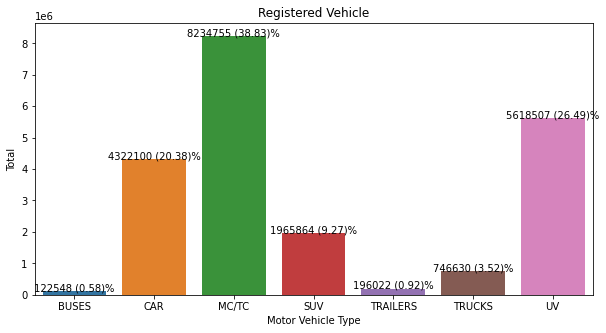

In [10]:
groupedvalues = df.groupby('Motor Vehicle Type').sum().reset_index()
groupedvalues.head()

plt.figure(figsize=(10,5))
g =sns.barplot(x='Motor Vehicle Type',y='Total',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Total, str(round(row.Total,2)) + ' (' + str(round((round(row.Total,2) / total) * 100, 2)) + ')%', color='black', ha="center")
plt.title('Registered Vehicle')

Text(0.5, 1.0, 'Bar-plot based on year')

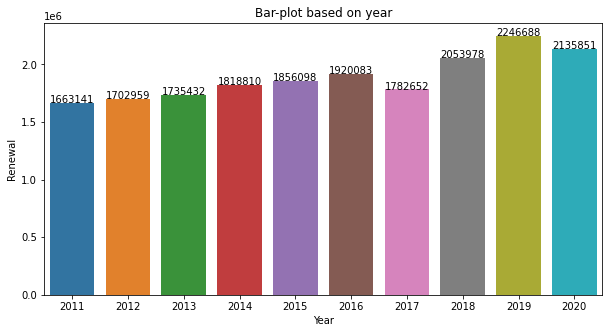

In [11]:
groupedvalues = df.groupby('Year').sum().reset_index()
groupedvalues.head()

plt.figure(figsize=(10,5))
g =sns.barplot(x='Year',y='Renewal',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Renewal, round(row.Renewal,2), color='black', ha="center")
plt.title('Bar-plot based on year')

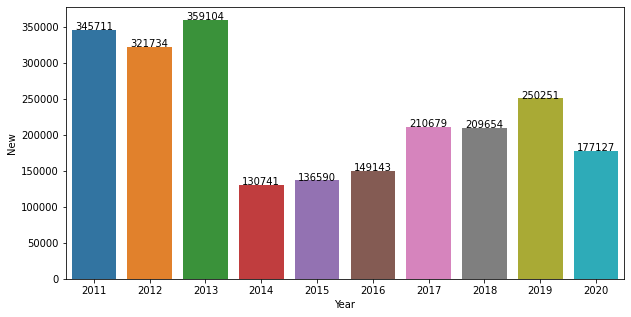

In [12]:
groupedvalues = df.groupby('Year').sum().reset_index()
groupedvalues.head()

plt.figure(figsize=(10,5))
g =sns.barplot(x='Year',y='New',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.New, round(row.New,2), color='black', ha="center")

Text(0.5, 1.0, 'Registered Vehicle')

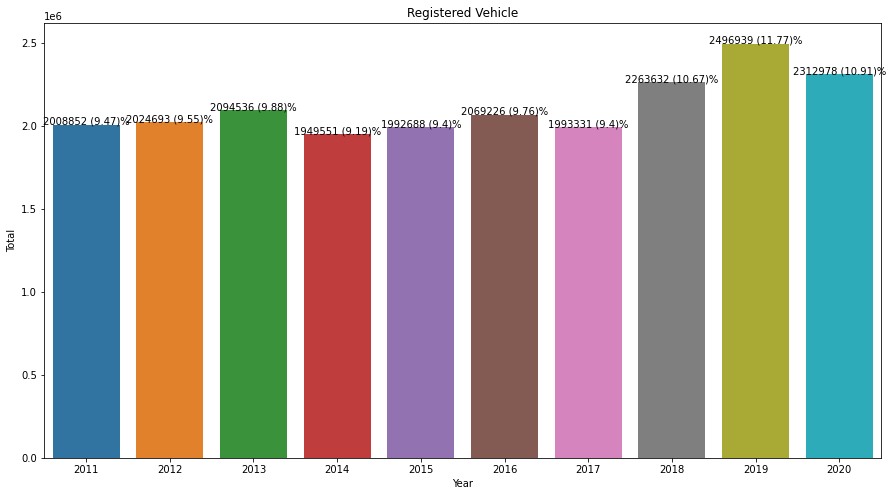

In [13]:
groupedvalues = df.groupby('Year').sum().reset_index()
groupedvalues.head()

plt.figure(figsize=(15,8))
g =sns.barplot(x='Year',y='Total',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Total, str(round(row.Total,2)) + ' (' + str(round((round(row.Total,2) / total) * 100, 2)) + ')%', color='black', ha="center", fontsize=10)
plt.title('Registered Vehicle')

# Pivot Table

In [14]:
df.pivot_table(index="Year", columns="Motor Vehicle Type", aggfunc="sum", values="Total", margins=True)

Motor Vehicle Type,BUSES,CAR,MC/TC,SUV,TRAILERS,TRUCKS,UV,All
Year,,,,,,,,
2011,13344,443607,733784,154874,16911,72081,574251,2008852
2012,13006,446905,744819,165313,18215,72032,564403,2024693
2013,13988,450246,772569,183942,18029,78488,577274,2094536
2014,11016,408469,734473,164953,16799,72634,541207,1949551
2015,12027,416475,746722,170761,17828,74892,553983,1992688
2016,13254,434560,767507,180038,21898,78046,573923,2069226
2017,6083,394017,806352,214071,19874,56919,496015,1993331
2018,12609,439610,914953,231040,19217,74804,571399,2263632
2019,14119,461120,1043579,260568,26147,86894,604512,2496939


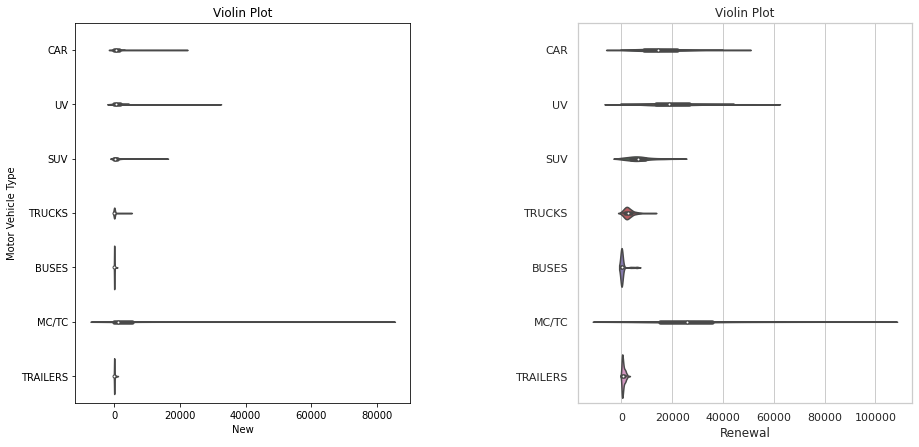

In [15]:
plt.figure(1, figsize=(15,7))
n=0
for cols in ['New', 'Renewal']:
    n += 1
    plt.subplot(1, 2, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Motor Vehicle Type' , data = df)
    plt.ylabel('Motor Vehicle Type' if n == 1 else '')
    plt.title('Violin Plot')
plt.show()